## Python Functions for Time Series Modelling

* Python functions useful in analysis and modelling of time series data
* Needed for converting time series into features like converting a time series pattern over a year into a customer 30 day frequency of purchase, 60 days frequency of purchase, 90 days frequency of purchase.
* Taking the time series data, decompsing it and converting it into features that a model can understand.
* These functions can be manually written but Pandas provide a lot of these functions and that speed up the entire process.
* Some of the models like Double Smoothing or ARIMA need data to be stationary. These functions can be used for removing the trend from the time series data and making then appropriate for such models.
* These functions help us understand the data better. The data may be in seconds/micro seconds and hard to understand (too many data points). These functions help us sample the data in such a way that we can easily visualize and understand it.  

In [1]:
import datetime
import pandas as pd
import requests
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (8, 6)
plt.rcParams["axes.grid"] = False

# code formatter
%load_ext nb_black

<IPython.core.display.Javascript object>

In [2]:
coindeskURL = "https://api.coindesk.com/v1/bpi/historical/close.json?"

start = datetime.date(2017, 1, 1)
end = datetime.date(2020, 7, 2)

url = f"{coindeskURL}start={start:%Y-%m-%d}&end={end:%Y-%m-%d}"

result = requests.get(
    url
)  # fetching the data real time usign requests API # pull all the bitcoin data from Jan 1, 2017 till Jul 7, 2020
result.content

b'{"bpi":{"2017-01-01":997.6888,"2017-01-02":1018.05,"2017-01-03":1030.8175,"2017-01-04":1129.87,"2017-01-05":1005.815,"2017-01-06":895.67,"2017-01-07":905.17,"2017-01-08":913.5238,"2017-01-09":899.35,"2017-01-10":904.7925,"2017-01-11":775.9813,"2017-01-12":802.8288,"2017-01-13":826.1213,"2017-01-14":818.6388,"2017-01-15":822.4225,"2017-01-16":830.2638,"2017-01-17":904.4538,"2017-01-18":884.2513,"2017-01-19":898.0213,"2017-01-20":891.6238,"2017-01-21":920.0113,"2017-01-22":925.3313,"2017-01-23":912.6875,"2017-01-24":885.6475,"2017-01-25":894.11,"2017-01-26":915.1,"2017-01-27":918.5625,"2017-01-28":920.28,"2017-01-29":914.0438,"2017-01-30":920.2413,"2017-01-31":967.6675,"2017-02-01":987.3463,"2017-02-02":1007.795,"2017-02-03":1018.1113,"2017-02-04":1033.6525,"2017-02-05":1013.9938,"2017-02-06":1024.6125,"2017-02-07":1052.5388,"2017-02-08":1054.3438,"2017-02-09":988.9475,"2017-02-10":993.0788,"2017-02-11":1010.0025,"2017-02-12":999.5125,"2017-02-13":996.8575,"2017-02-14":1009.2513,"2017-

<IPython.core.display.Javascript object>

In [3]:
data = pd.read_json(result.content).iloc[:-2, :1]
data.index.name = "date"
data.index = pd.to_datetime(data.index)
data

,bpi
date,
2017-01-01,997.6888
2017-01-02,1018.0500
2017-01-03,1030.8175
2017-01-04,1129.8700
2017-01-05,1005.8150
...,...
2020-06-28,8991.5000
2020-06-29,9096.1500
2020-06-30,9144.3850


<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='date'>

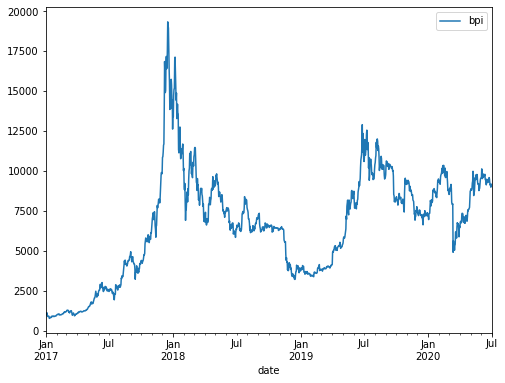

<IPython.core.display.Javascript object>

In [4]:
# this data is for 2 years and is at daily level

data.plot()

## RESAMPLING (could be UPSAMPLING or DOWNSAMPLING)

Kind of aggregating minutely distributed data (daily, hourly, second etc.) into some condensed form like quarterly.


D Calendar day

B Business day

W Weekly

M Month

Q Quarter

A Year end

H Hours

T Minutes

S Seconds

In [5]:
# aggregate the data quaterly and take the mean of it.

data.resample("Q").mean()

,bpi
date,
2017-03-31,1034.169242
2017-06-30,1919.658520
2017-09-30,3506.611449
2017-12-31,9413.347972
2018-03-31,10468.423818
2018-06-30,7747.165877
2018-09-30,6798.307918
2018-12-31,5169.904503
2019-03-31,3781.639959


<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='date'>

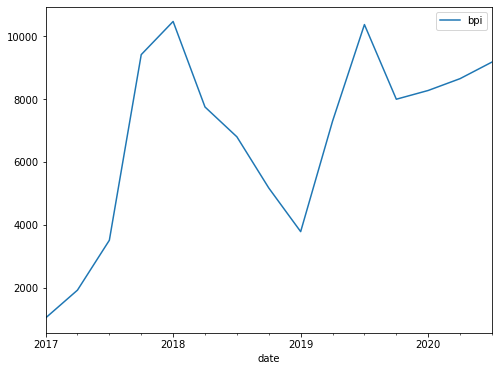

<IPython.core.display.Javascript object>

In [6]:
# if we compare this plot to the original plot we can see that the pattern has been captured (on high level) but still the
# minute details are kind of lost. So in next plot we will try Monthly aggregation.

data.resample("Q").mean().plot()

<AxesSubplot:xlabel='date'>

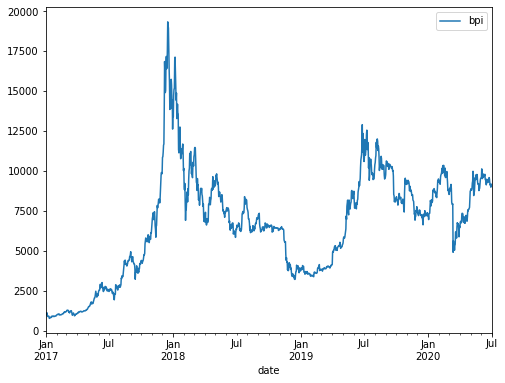

<IPython.core.display.Javascript object>

In [7]:
# original

data.plot()

<AxesSubplot:xlabel='date'>

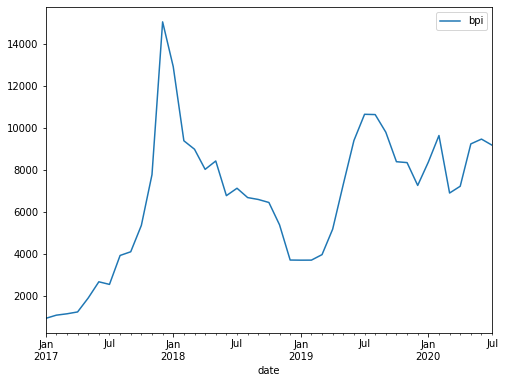

<IPython.core.display.Javascript object>

In [8]:
# monthly resample. Here we are UPSAMPLING. This plot is closer to the original plot's pattern.

data.resample("M").mean().plot()

#### UPSAMPLING is a good technique to use if your data has millions of data points. We can aggregate and visualize it better.

## PANDAS DIFF() FUNCTION

Diff() is used for de-trending the data. 

In [9]:
# taking the first 5 elements

data[:5]

,bpi
date,
2017-01-01,997.6888
2017-01-02,1018.0500
2017-01-03,1030.8175
2017-01-04,1129.8700
2017-01-05,1005.8150


<IPython.core.display.Javascript object>

In [10]:
# diff() subtracts the previous value from the current value. Difference by a period of 1.

data[:5].diff()

,bpi
date,
2017-01-01,NaN
2017-01-02,20.3612
2017-01-03,12.7675
2017-01-04,99.0525
2017-01-05,-124.0550


<IPython.core.display.Javascript object>

In [11]:
# difference by from second last period exaple 1020.8175 - 997.6888 = 33.1287

data[:5].diff(2)

,bpi
date,
2017-01-01,NaN
2017-01-02,NaN
2017-01-03,33.1287
2017-01-04,111.8200
2017-01-05,-25.0025


<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='date'>

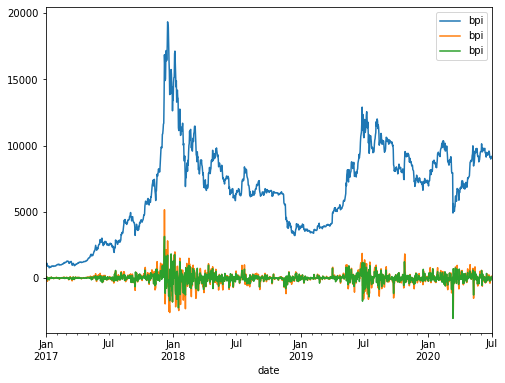

<IPython.core.display.Javascript object>

In [12]:
pd.concat([data["bpi"], data["bpi"].diff(2), data["bpi"].diff()], axis=1).plot()

### Above, we can see that the data has been completely de-trended when we used diff() - orange and green lines. These 2 lines show that now that the data is Stationary whereas the original blue line data has trends.

Now we can apply ARIMA model on this data.

## PANDAS SHIFT() FUNCTION

Shift() function shifts the index by a decided number of index value or the data value.

#### A use case for shift function is the coronavirus situation where once the COVID situation is over, the business can shift back to one year ago to forecast for future. Other factors need to be considered too though like whether it was a v-shaped recovery or u-shaped recovery etc.

If the data is monthly level and you shift it by 12, it will move previous 12 months data to current. 

In [13]:
# taking the first 5 elements

data[:5]

,bpi
date,
2017-01-01,997.6888
2017-01-02,1018.0500
2017-01-03,1030.8175
2017-01-04,1129.8700
2017-01-05,1005.8150


<IPython.core.display.Javascript object>

In [14]:
data[:5].shift()

,bpi
date,
2017-01-01,NaN
2017-01-02,997.6888
2017-01-03,1018.0500
2017-01-04,1030.8175
2017-01-05,1129.8700


<IPython.core.display.Javascript object>

In [15]:
# tshift() shifts the data (by 2 units here). It moves the index (date in this case). The first date now starts from
# 2017-01-03 instead of 2017-01-01
# tshift stands for time shift

data[:5].tshift(2)

C:\Users\eshom\.virtualenvs\Time-Series-Analysis-_uebZNaW\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: tshift is deprecated and will be removed in a future version. Please use shift instead.
  """


,bpi
date,
2017-01-03,997.6888
2017-01-04,1018.0500
2017-01-05,1030.8175
2017-01-06,1129.8700
2017-01-07,1005.8150


<IPython.core.display.Javascript object>

In [16]:
# this is the exact value we got using diff()

data[:5] - data[:5].shift()

,bpi
date,
2017-01-01,NaN
2017-01-02,20.3612
2017-01-03,12.7675
2017-01-04,99.0525
2017-01-05,-124.0550


<IPython.core.display.Javascript object>

In [17]:
# this is the exact value we got using diff(2)

data[:5] - data[:5].shift(2)

,bpi
date,
2017-01-01,NaN
2017-01-02,NaN
2017-01-03,33.1287
2017-01-04,111.8200
2017-01-05,-25.0025


<IPython.core.display.Javascript object>

C:\Users\eshom\.virtualenvs\Time-Series-Analysis-_uebZNaW\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: tshift is deprecated and will be removed in a future version. Please use shift instead.
  """Entry point for launching an IPython kernel.


<AxesSubplot:xlabel='date'>

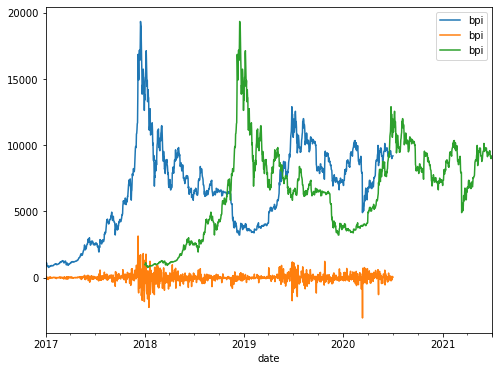

<IPython.core.display.Javascript object>

In [18]:
pd.concat([data, data - data.shift(), data.tshift(365)], axis=1).plot()

### Above - 

* Blue line is the original daily time series data
* Orange line is the data-data.shift() and we have removed the trend here.
* Green line shows the shift of the entire day by 365 days i.e. 1 year. So now it starts from 2018 and ends at 2021. Some scenarios need this kind of a shift. 

## ROLLING WINDOW FUNCTION 

* Rolling window is used when we want to calculate averages.
* Take a scenario of recency, frequency and monetary analysis example to check the recency of customer visit we check how frequently the customer visisted say in last 10 days or last 1 week or in 1 last month etc. We calculate multiple time buckets using rolling window which takes an average of that particulay window size. Below, our data is a daily data, so window size 0f 10 will take an average of last 10 days (t, t-1, t-2, ..., t-10).
* All these moving average functions like last 10 days, last 20 days, last 100 days, exponential moving average etc. are used for feature engineering purposes or in trading purposes.

<AxesSubplot:xlabel='date'>

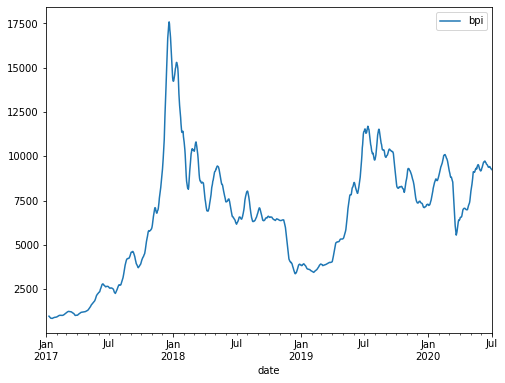

<IPython.core.display.Javascript object>

In [19]:
data.rolling(window=10).mean().plot()

<AxesSubplot:xlabel='date'>

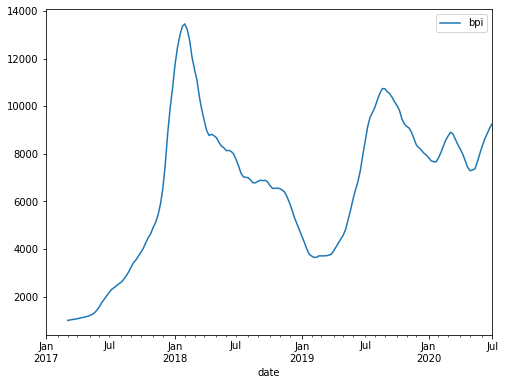

<IPython.core.display.Javascript object>

In [20]:
# we can also combine multiple functions like below - resampling at weekly level and then taking the moving average of
# last 10 weeks. It can be used to smoothen the data to feed it into the model (if needed).

data.resample("W").mean().rolling(window=10).mean().plot()

<AxesSubplot:xlabel='date'>

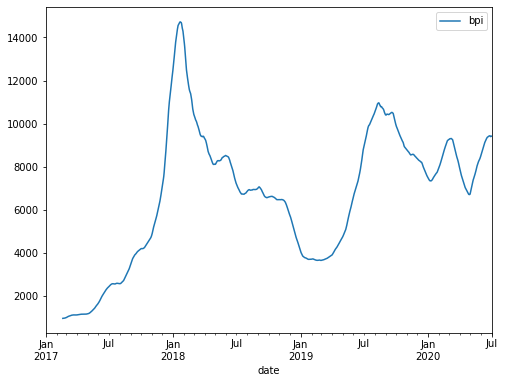

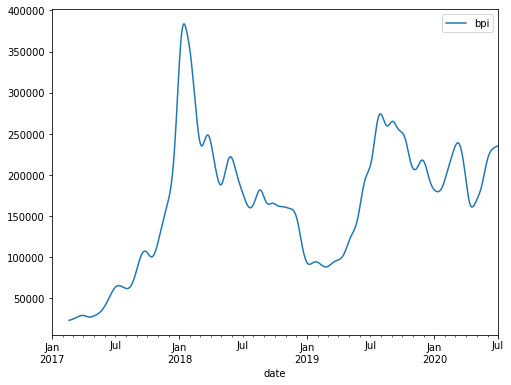

<IPython.core.display.Javascript object>

In [21]:
# as an alternate to exponential moving average, we can assihn weights by using the below method where we are specifying
# the window type as "gaussian" with a standard deviation of 10. If we compare it with the above plot, we can see that this
# one has captured the initial pattern better as the one above

data.rolling(window=50).mean().plot()
data.rolling(window=50, win_type="gaussian").sum(std=10).plot()

<AxesSubplot:xlabel='date'>

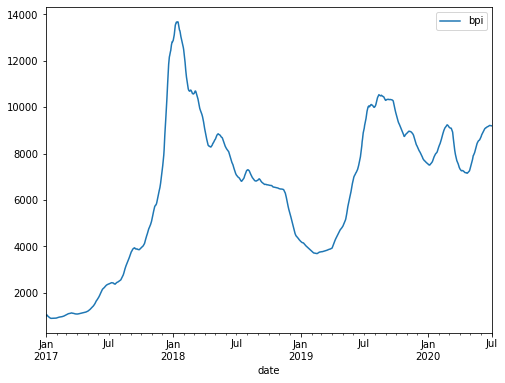

<IPython.core.display.Javascript object>

In [22]:
# exponential weighted moving average - used when we want to weight recent/current values more than the previous values.

data.ewm(span=50).mean().plot()

<AxesSubplot:xlabel='date'>

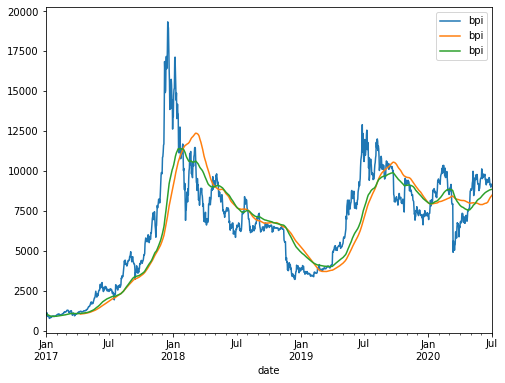

<IPython.core.display.Javascript object>

In [23]:
pd.concat(
    [data, data.rolling(window=100).mean(), data.ewm(span=100).mean()], axis=1
).plot()

## Above - 

* Green line is for exponential weighted moving average and we can see that it has captured the patterns earlier than the simple moving average (orange line). 
* EWM is preferred over simple moving average for this reason.